泰坦尼克号-数据挖掘案例解读

挑选兵器：

任务已经明确下达，接下来的目的就是挑选几个合适的兵器去进行预测的工作啦，咱们的主线是使用Python，因为在数据分析与机器学习界Python已经成为一哥啦！首先介绍下咱们的兵器谱!

    Numpy-科学计算库 主要用来做矩阵运算，什么？你不知道哪里会用到矩阵，那么这样想吧，咱们的数据就是行（样本）和列（特征）组成的，那么数据本身不就是一个矩阵嘛。

    Pandas-数据分析处理库 很多小伙伴都在说用python处理数据很容易，那么容易在哪呢？其实有了pandas很复杂的操作我们也可以一行代码去解决掉！

    Matplotlib-可视化库 无论是分析还是建模，光靠好记性可不行，很有必要把结果和过程可视化的展示出来。

    Seaborn-可视化库 更简单的可视化库封装上Matplot基础之上。

    Scikit-Learn-机器学习库 非常实用的机器学习算法库，这里面包含了基本你觉得你能用上所有机器学习算法啦。但还远不止如此，还有很多预处理和评估的模块等你来挖掘的！

In [8]:
# 导入需要的兵器库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')#忽略api版本问题等警告
%matplotlib inline
#为了直接显示图形。不用plt.show()


 第二步：数据读取

In [9]:
# 读取数据，并进行展示
data = pd.read_csv('train.csv')#读取数据
data.head()#展示前五条数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 统计数据各项指标
data.isnull().sum()#对缺失值进行统计计数

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#对数据进行整体描述
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


用图表查看获救比例

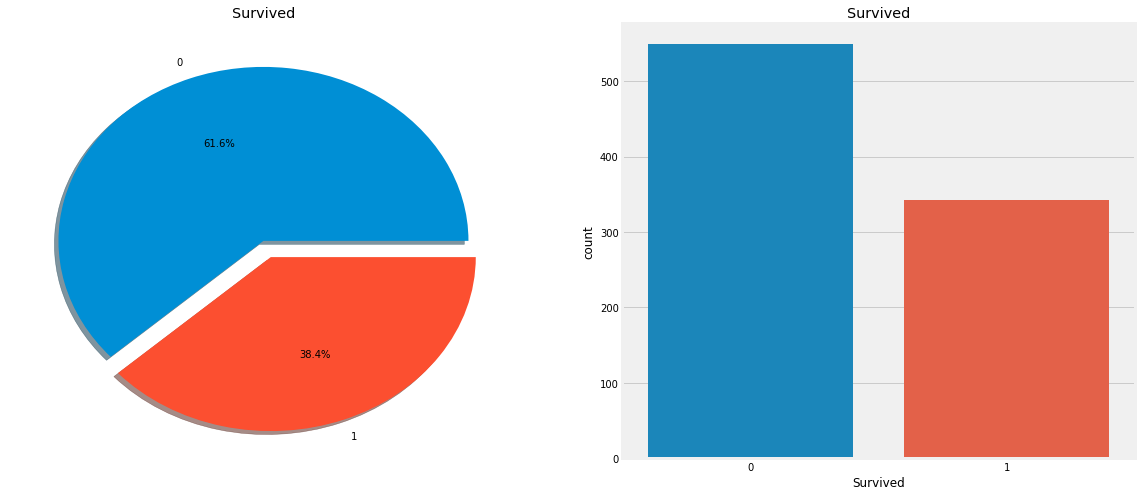

In [12]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data["Survived"].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',ax=ax[0],shadow=True)
# value_counts()对该分类特征的分类分别计数
#data.plot.pie()生成饼图。
# pandas.DataFrame.plot.pie(y =无，** kwds )生成饼图。
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
# sns.countplot 使用条形显示每个分类箱中的观察计数。
ax[1].set_title('Survived')
plt.show()

显然，这次事故中没有多少乘客幸免于难。

在训练集的891名乘客中，只有大约350人幸存下来，只有38.4%的机组人员在空难中幸存下来。我们需要从数据中挖掘出更多的信息，看看哪些类别的乘客幸存下来，哪些没有。

我们将尝试使用数据集的不同特性来检查生存率。比如性别，年龄，登船地点等，但是首先我们得来理解下数据中的特征！

 数据特征分为：连续值和离散值
 
    ·离散值：性别（男，女） 登船地点（S,Q,C）
    ·连续值：年龄，船票价格
    

In [13]:
data.groupby(['Sex','Survived'])['Survived'].count()
#以'Sex','Survived'分组，并形成交叉表，且先以Sex分再以Survived,
# 并以Survived来计数



Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
data.groupby(['Survived','Sex'])['Survived'].count()
#以'Sex','Survived'分组，并形成交叉表，且先以Sex分再以Survived

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64